In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
plt.style.use('fivethirtyeight')

In [9]:
df = pd.read_csv('./datalab/udemy-courses/udemy_courses.csv')

In [101]:
df.head(2)

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,true,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,true,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance


In [99]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3682 entries, 0 to 3682
Data columns (total 13 columns):
index                  3682 non-null int64
course_id              3682 non-null int64
course_title           3682 non-null object
url                    3682 non-null object
is_paid                3682 non-null object
price                  3682 non-null object
num_subscribers        3682 non-null int64
num_reviews            3682 non-null int64
num_lectures           3682 non-null int64
level                  3682 non-null object
content_duration       3682 non-null object
published_timestamp    3682 non-null object
subject                3682 non-null object
dtypes: int64(5), object(8)
memory usage: 1.6 MB


In [100]:
df[df['is_paid'] == 'https://www.udemy.com/learnguitartoworship/']

,index,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


In [36]:
# df.set_index('course_id').reset_index()
df.drop([2066],inplace=True)

## Course Type is Paid or Free 

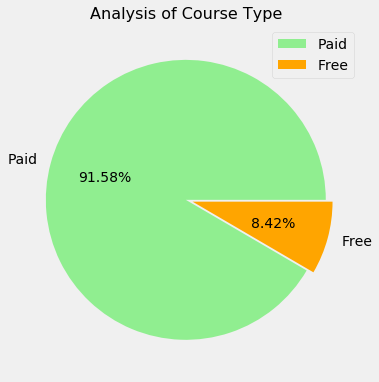

In [140]:
labels = ['Paid', 'Free']
df['is_paid'] = df['is_paid'].str.lower()
size = df['is_paid'].value_counts()

explode = [0, 0.05]

plt.rcParams['figure.figsize'] = (6, 6)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Analysis of Course Type', fontsize = 16)
plt.axis('off')
plt.legend()
plt.show()

## Course Subject Type

Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64


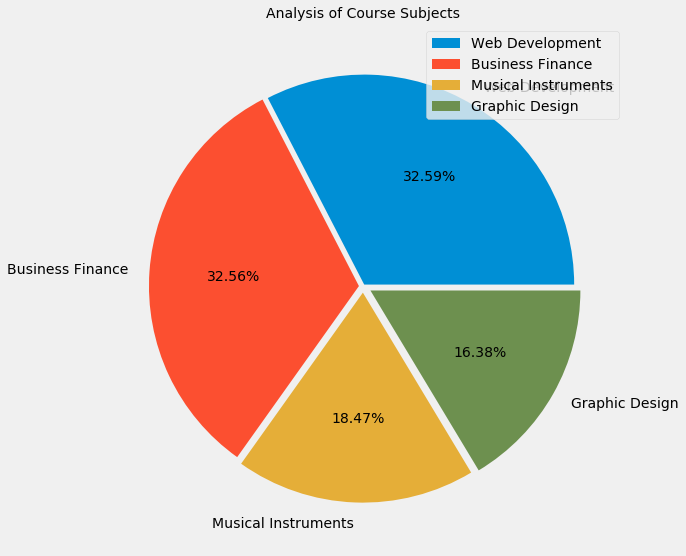

In [57]:
labels = ['Web Development', 'Business Finance', 'Musical Instruments', 'Graphic Design']
size = df['subject'].value_counts()
print(size)
explode = [0.01, 0.02,0.03,0.04]

plt.rcParams['figure.figsize'] = (13, 9)
plt.pie(size, explode = explode, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Analysis of Course Subjects', fontsize = 14)
# plt.axis('off')
plt.legend()
plt.show()

## Course type by courses

In [114]:
data = df.groupby('subject')['is_paid'].value_counts().unstack().reset_index()

In [115]:
data = data.melt(id_vars='subject', value_vars=['true','false'], value_name='counts')

In [137]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Paid', x=data['subject'], y=data.loc[ data['is_paid']=='true' , 'counts']),
    go.Bar(name='Free', x=data['subject'], y=data.loc[ data['is_paid']=='false' , 'counts'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [224]:
max_subs = df[['course_title', 'num_subscribers', 'num_reviews', 'price']]

In [225]:
max_subs = max_subs.sort_values(by='num_subscribers', ascending=False).head(10)

In [226]:
max_subs

,course_title,num_subscribers,num_reviews,price
2832,Learn HTML5 Programming From Scratch,268923,8629,Free
3037,Coding for Entrepreneurs Basic,161029,279,Free
3235,The Web Developer Bootcamp,121584,27445,200
2788,Build Your First Website in 1 Week with HTML5 ...,120291,5924,Free
3237,The Complete Web Developer Course 2.0,114512,22412,200
1900,Free Beginner Electric Guitar Lessons,101154,1042,Free
2594,Web Design for Web Developers: Build Beautiful...,98867,6512,Free
2624,Learn Javascript & JQuery From Scratch,84897,2685,30
3294,Practical PHP: Master the Basics and Code Dyna...,83737,4598,Free
3252,JavaScript: Understanding the Weird Parts,79612,16976,175


In [234]:
fig = go.Figure(data=[
    go.Bar(name='Subscribers', x=max_subs['course_title'], y=max_subs['num_subscribers'],text=max_subs['num_subscribers'],textposition='auto'),
    go.Bar(name='Reviews', x=max_subs['course_title'], y=max_subs['num_reviews'],text=max_subs['num_reviews'],textposition='auto')
])

# Change the bar mode
fig.update_layout(barmode='group',xaxis_tickangle=-40)
fig.show()

## Top 10 courses

In [238]:
fig = go.Figure(data=[
    go.Bar(name='Subscribers', x=max_subs['num_subscribers'], y=max_subs['course_title'], orientation='h'),
])
fig.show()

In [241]:
import plotly.express as px

fig = px.bar(max_subs, x='course_title', y='num_subscribers',
             hover_data=['num_subscribers'], color='num_subscribers',
             labels={'pop':'Top 10 courses'}, height=600)
fig.show()

Text(0, 0.5, 'Count')

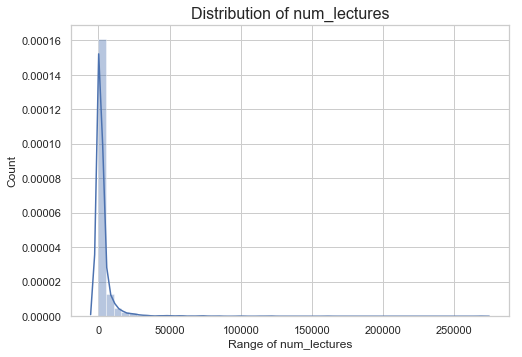

In [247]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (7, 5)

plt.subplot(1, 1, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['num_subscribers'])
plt.title('Distribution of num_lectures', fontsize = 16)
plt.xlabel('Range of num_lectures')
plt.ylabel('Count')